# CIFAR 10 - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


> ## 2) One Hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - CNN & DNN

In [27]:
from tensorflow.keras import models, layers

cifar_10 = models.Sequential()
cifar_10.add(layers.Conv2D(filters = 40, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))
cifar_10.add(layers.MaxPool2D(pool_size = (2,2)))
cifar_10.add(layers.Conv2D(filters = 60, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))
cifar_10.add(layers.MaxPool2D(pool_size = (2,2)))
cifar_10.add(layers.Conv2D(filters = 60, kernel_size = (4,4), activation = 'relu', input_shape=(32,32,3)))

cifar_10.add(layers.Flatten())
cifar_10.add(layers.Dense(units = 60))
cifar_10.add(layers.BatchNormalization())
cifar_10.add(layers.Activation('relu'))
cifar_10.add(layers.Dense(units = 10, activation = 'softmax'))

* 모델 구조 확인

In [28]:
cifar_10.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 40)        1960      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 40)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 60)        38460     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 60)          57660     
_________________________________________________________________
flatten_2 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 60)               

In [29]:
# earlyStopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 30,
                   verbose = 1)
mc = ModelCheckpoint('best_model.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

> ## 2) Model Compile

* 모델 학습방법 설정

In [30]:
cifar_10.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [31]:
%%time

hist_cifar10 = cifar_10.fit(X_train, y_train,
                            epochs = 100,
                            batch_size = 128,
                            callbacks = [mc],  # val_loss의 분포를 보기 위해서 es를 주지 않음, accuracy가 높은 모델만 저장
                            validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 1.5203 - accuracy: 0.4541 - val_loss: 1.6953 - val_accuracy: 0.4012

Epoch 00001: val_accuracy improved from -inf to 0.40120, saving model to best_model.h5
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1664 - accuracy: 0.5871 - val_loss: 1.3896 - val_accuracy: 0.5232

Epoch 00002: val_accuracy improved from 0.40120 to 0.52320, saving model to best_model.h5
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.0322 - accuracy: 0.6346 - val_loss: 1.6540 - val_accuracy: 0.4695

Epoch 00003: val_accuracy did not improve from 0.52320
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.9417 - accuracy: 0.6683 - val_loss: 1.4030 - val_accuracy: 0.5317

Epoch 00004: val_accuracy improved from 0.52320 to 0.53170, saving model to best_model.h5
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.8856 - accuracy: 0.6889 -

> ## 4) 학습 결과 시각화

* Loss Visualization

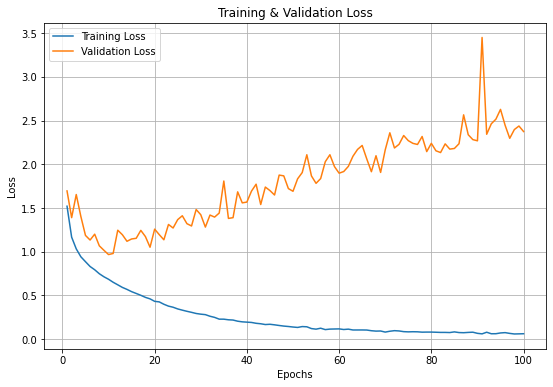

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_cifar10.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_cifar10.history['loss'])
plt.plot(epochs, hist_cifar10.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [33]:
loss, accuracy = cifar_10.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 2.5434 - accuracy: 0.6394
Loss = 2.54342
Accuracy = 0.63940


In [34]:
from keras.models import load_model
best_model = load_model('best_model.h5')  

In [35]:
loss, accuracy = best_model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 13s 3ms/step - loss: 1.3238 - accuracy: 0.6771
Loss = 1.32380
Accuracy = 0.67710


# 
# 
# 
# The End
# 
# 
# 